# 점수

In [1]:
from gensim.models import word2vec
import os, json, glob, sys, numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, Bidirectional, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend.tensorflow_backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

Using TensorFlow backend.


In [0]:
gp_data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/glowpick_end.csv')

In [0]:
X = gp_data.iloc[:, 10].values
y= gp_data.iloc[:,5].values

In [0]:
max_word = 7000
max_len = 60

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X)

In [0]:
categories = ['1', '2', '3', '4', '5']
nb_classes = len(categories)
Y = np_utils.to_categorical(y-1)

In [0]:
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.2, random_state=99, shuffle=True, stratify=y)

In [0]:
with K.tf_ops.device('/device:GPU:0'):
    models = Sequential()
    
    models.add(Embedding(max_word, 64, input_length=max_len))
    models.add(LSTM(60, return_sequences=True))
    models.add(GlobalMaxPool1D())
    models.add(Dropout(0.2))
    models.add(Dense(50, activation='relu'))
    models.add(Dropout(0.5))
    models.add(Dense(nb_classes, activation='softmax'))
    models.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/review_LSTM.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=7)

In [9]:
models.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 64)            448000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            30000     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [10]:
hist = models.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 34297 samples, validate on 8575 samples
Epoch 1/20
34297/34297 [==============================] - 28s 812us/step - loss: 1.3006 - accuracy: 0.3868 - val_loss: 1.1124 - val_accuracy: 0.4959

Epoch 00001: val_loss improved from inf to 1.11243, saving model to ./model/review_LSTM.model
Epoch 2/20
34297/34297 [==============================] - 27s 785us/step - loss: 1.0563 - accuracy: 0.5263 - val_loss: 1.0107 - val_accuracy: 0.5403

Epoch 00002: val_loss improved from 1.11243 to 1.01070, saving model to ./model/review_LSTM.model
Epoch 3/20
34297/34297 [==============================] - 27s 778us/step - loss: 0.9515 - accuracy: 0.5846 - val_loss: 1.0114 - val_accuracy: 0.5476

Epoch 00003: val_loss did not improve from 1.01070
Epoch 4/20
34297/34297 [==============================] - 27s 782us/step - loss: 0.8896 - accuracy: 0.6157 - val_loss: 1.0229 - val_accuracy: 0.5482

Epoch 00004: val_loss did not improve from 1.01070
Epoch 5/20
34297/34297 [==============================] -

In [11]:
print("정확도 : %.4f" % (models.evaluate(X_test, y_test)[1]))

10718/10718 [==============================] - 3s 260us/step
정확도 : 0.5278


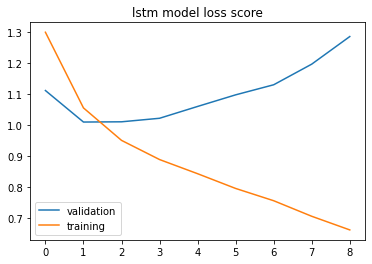

In [12]:

y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='validation')
plt.plot(x_len, y_loss, label='training')
plt.legend()
plt.title("lstm model loss score")
plt.show()

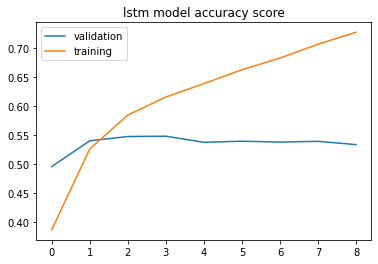

In [13]:
y_vloss = hist.history['val_accuracy']
y_loss = hist.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='validation')
plt.plot(x_len, y_loss, label='training')
plt.legend()
plt.title("lstm model accuracy score")
plt.show()

# 긍/부정

In [0]:
from gensim.models import word2vec
import os, json, glob, sys, numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, Bidirectional, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend.tensorflow_backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [0]:
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/glowpick_end.csv')

In [16]:
X = data.iloc[:, 10].values
y= data.iloc[:,5]
type(y)

pandas.core.series.Series

In [17]:
for i in range(len(y)):
  if y[i] > 3:
    y[i] = 1
  else:
    y[i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
y_arr = y.values
y_arr

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
max_word = 7000
max_len = 60

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X)

In [0]:
categories = ['negative','positive']
nb_classes = len(categories)
Y = np_utils.to_categorical(y_arr)

In [0]:
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.2, random_state=99, shuffle=True, stratify=y)

In [0]:
with K.tf_ops.device('/device:GPU:0'):
    models = Sequential()
    
    models.add(Embedding(max_word, 64, input_length=max_len))
    models.add(LSTM(60, return_sequences=True))
    models.add(GlobalMaxPool1D())
    models.add(Dropout(0.2))
    models.add(Dense(50, activation='relu'))
    models.add(Dropout(0.5))
    models.add(Dense(nb_classes, activation='softmax'))
    models.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/review_LSTM.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=7)

In [24]:
models.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 64)            448000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            30000     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 60)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [25]:
hist = models.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 34297 samples, validate on 8575 samples
Epoch 1/20
34297/34297 [==============================] - 27s 799us/step - loss: 0.5067 - accuracy: 0.7616 - val_loss: 0.4136 - val_accuracy: 0.8150

Epoch 00001: val_loss improved from inf to 0.41358, saving model to ./model/review_LSTM.model
Epoch 2/20
34297/34297 [==============================] - 27s 790us/step - loss: 0.3757 - accuracy: 0.8409 - val_loss: 0.4020 - val_accuracy: 0.8219

Epoch 00002: val_loss improved from 0.41358 to 0.40199, saving model to ./model/review_LSTM.model
Epoch 3/20
34297/34297 [==============================] - 27s 799us/step - loss: 0.3241 - accuracy: 0.8674 - val_loss: 0.4228 - val_accuracy: 0.8164

Epoch 00003: val_loss did not improve from 0.40199
Epoch 4/20
34297/34297 [==============================] - 27s 798us/step - loss: 0.2789 - accuracy: 0.8899 - val_loss: 0.4495 - val_accuracy: 0.8171

Epoch 00004: val_loss did not improve from 0.40199
Epoch 5/20
34297/34297 [==============================] -

In [26]:
print("정확도 : %.4f" % (models.evaluate(X_test, y_test)[1]))

10718/10718 [==============================] - 3s 288us/step
정확도 : 0.8118


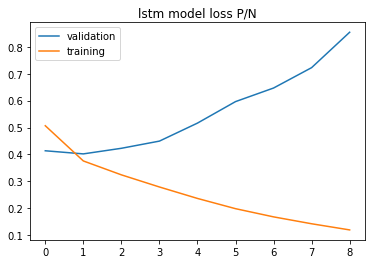

In [27]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='validation')
plt.plot(x_len, y_loss, label='training')
plt.legend()
plt.title("lstm model loss P/N")
plt.show()

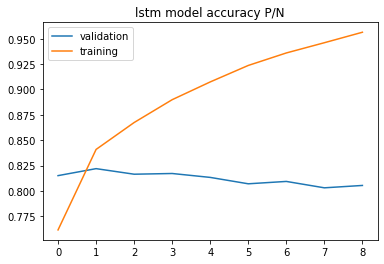

In [28]:
y_vloss = hist.history['val_accuracy']
y_loss = hist.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='validation')
plt.plot(x_len, y_loss, label='training')
plt.legend()
plt.title("lstm model accuracy P/N")
plt.show()